<a href="https://colab.research.google.com/github/AsifShaafi/LinkedIn-Deep-Learning-Foundations-Natural-Language-Processing-with-TensorFlow/blob/main/02_05_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Classification challenge

You are required to train a deep learning model on the IMDB reviews dataset and classify a set of new reviews as positive(1) or negative(0) using the trained model.

In [1]:
##import the required libraries and APIs
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.15.0


## Downloading the TensorFlow `imdb_review` dataset

> Make sure tensorflow_datasets is installed

In [3]:
##load the imdb reviews dataset
data, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteTDTZ0L/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteTDTZ0L/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteTDTZ0L/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [5]:
info


tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_dir=PosixGPath('/tmp/tmp41owaop0tfds'),
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(), dtype=string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_shards=1>,
        'train': <SplitInfo

## Segregating training and testing sets

In [6]:
##segregate training and test set
train_data, test_data = data['train'], data['test']

##create empty list to store sentences and labels
train_sentences = []
test_sentences = []

train_labels = []
test_labels = []

In [7]:
##iterate over the train data to extract sentences and labels
for sent, label in train_data:
    train_sentences.append(str(sent.numpy().decode('utf8')))
    train_labels.append(label.numpy())

##iterate over the test set to extract sentences and labels
for sent, label in test_data:
    test_sentences.append(str(sent.numpy().decode('utf8')))
    test_labels.append(label.numpy())



In [8]:
##convert lists into numpy array
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

## Data preparation - setting up the tokenizer

In [9]:
##define the parameters for the tokenizing and padding
vocab_size = 15000
embedding_dim = 32
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


In [10]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

##training sequences and labels
train_seqs = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_seqs, maxlen=max_length, truncating=trunc_type)

##testing sequences and labels
test_seqs = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_seqs,maxlen=max_length)

## Define the Neural Network with Embedding layer

1. Use the Sequential API.
2. Add an embedding input layer of input size equal to vocabulary size.
3. Add a flatten layer, and two dense layers.

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

##compile the model with loss function, optimizer and metrics
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 32)           480000    
                                                                 
 global_average_pooling1d (  (None, 32)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 24)                792       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 480817 (1.83 MB)
Trainable params: 480817 (1.83 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Model Training

In [13]:
num_epochs = 10

##train the model with training and validation set
history = model.fit(
    train_padded,   #training sequence
    train_labels, # training labels
    epochs=num_epochs,
    validation_data=(test_padded, test_labels) # test data
    )

Epoch 1/10
782/782 [==============================] - 12s 13ms/step - loss: 0.4769 - accuracy: 0.7901 - val_loss: 0.3469 - val_accuracy: 0.8509
Epoch 2/10
782/782 [==============================] - 13s 16ms/step - loss: 0.2757 - accuracy: 0.8875 - val_loss: 0.3350 - val_accuracy: 0.8546
Epoch 3/10
782/782 [==============================] - 10s 12ms/step - loss: 0.2105 - accuracy: 0.9192 - val_loss: 0.3862 - val_accuracy: 0.8368
Epoch 4/10
782/782 [==============================] - 11s 15ms/step - loss: 0.1676 - accuracy: 0.9395 - val_loss: 0.4206 - val_accuracy: 0.8381
Epoch 5/10
782/782 [==============================] - 14s 17ms/step - loss: 0.1335 - accuracy: 0.9546 - val_loss: 0.4853 - val_accuracy: 0.8280
Epoch 6/10
782/782 [==============================] - 9s 11ms/step - loss: 0.1050 - accuracy: 0.9666 - val_loss: 0.5555 - val_accuracy: 0.8216
Epoch 7/10
782/782 [==============================] - 8s 11ms/step - loss: 0.0831 - accuracy: 0.9748 - val_loss: 0.6432 - val_accuracy: 0

## Visualise the train & validation accuracy and loss

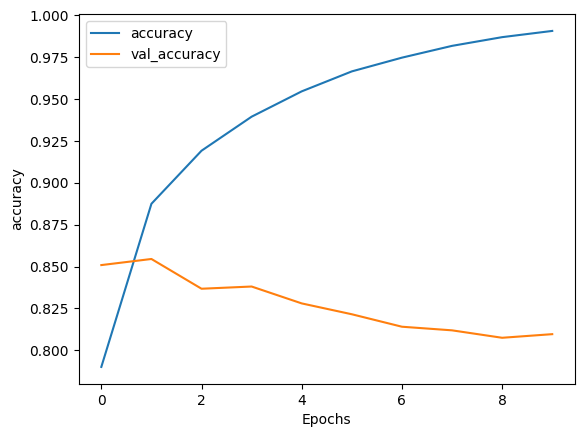

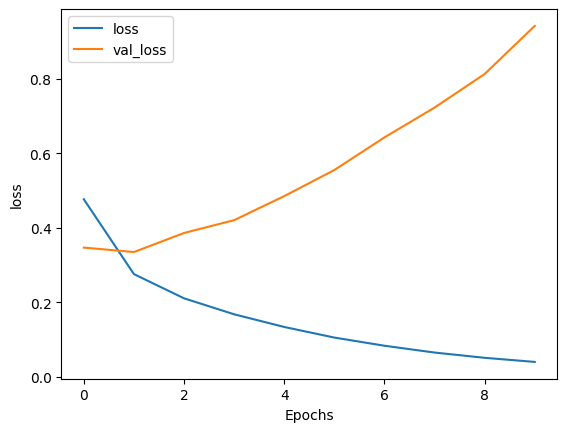

In [14]:
import matplotlib.pyplot as plt

##plot the scores from history
def plot_metrics(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+ metric])
  plt.legend([metric, 'val_'+metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.show()

##plot accuracy
plot_metrics(history, "accuracy")

##plot loss
plot_metrics(history, "loss")

## Classify new reviews

In [ ]:
sentence = ["The first part of the movie was dull and boring!", "We watched Queen's Gambit, all seven hours of it, in a single sitting. This show is an absolute gem."]

##prepare the sequences of the sentences in question
sequences = tokenizer.texts_to_sequences(sentence)
padded_seqs = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

##print the classification score
print(model.predict(padded_seqs))

[[0.05418146]
 [0.68782663]]
